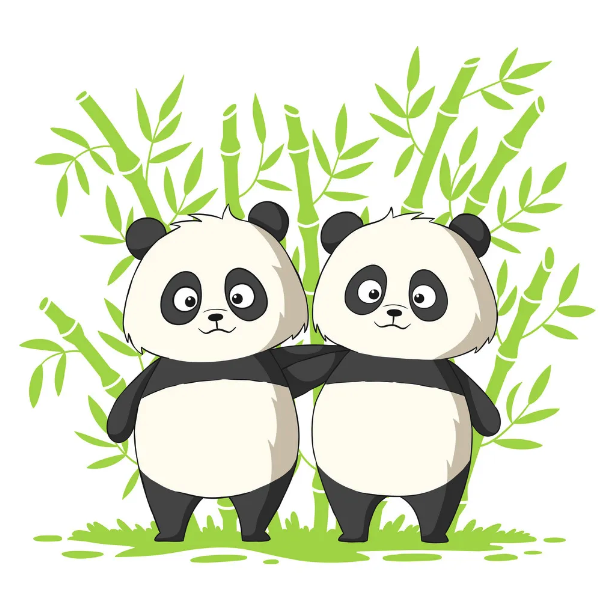

## Pandas
 - **Working with both rows and columns**    
 


- **More in-built ops in pandas**     
    - sum()     
    - count()     
    - mean()   

- **Sorting**  
  
- **Concatenation** 
    - pd.concat()
    - axis for concat
​
- **Merge**
    - Concat v/s Merge 
    - `left_on` and `right_on`
    - Joins
  
- **Intoduction to IMDB dataset**
    - Reading two datasets
​
- **Merging the dataframes**
    - `unique()` and `nunique()`
    - `isin()`
    - Using Left Join for `merge()`
​
- **Feature Exploration**
    - Create new features
​
- **Fetching data using pandas**
    - Quering from dataframe - Masking, Filtering, `&` and `|`
​
- **Apply**


In [1]:
import pandas as pd

In [2]:
users = pd.DataFrame({"userid":[1,2,3],"name":["Vishav","Varun","Sanjay"]})
users

userid    name
0       1  Vishav
1       2   Varun
2       3  Sanjay

In [3]:
msgs = pd.DataFrame({"userid":[1,1,2,4],"msg":["hmm","acha","theek hain","nice"]})
msgs

userid         msg
0       1         hmm
1       1        acha
2       2  theek hain
3       4        nice

In [4]:
pd.concat([users,msgs])

userid    name         msg
0       1  Vishav         NaN
1       2   Varun         NaN
2       3  Sanjay         NaN
0       1     NaN         hmm
1       1     NaN        acha
2       2     NaN  theek hain
3       4     NaN        nice

In [5]:
pd.concat([users,msgs],ignore_index=True)


userid    name         msg
0       1  Vishav         NaN
1       2   Varun         NaN
2       3  Sanjay         NaN
3       1     NaN         hmm
4       1     NaN        acha
5       2     NaN  theek hain
6       4     NaN        nice

In [6]:
pd.concat([users,msgs],axis=1) 

userid    name  userid         msg
0     1.0  Vishav       1         hmm
1     2.0   Varun       1        acha
2     3.0  Sanjay       2  theek hain
3     NaN     NaN       4        nice

In [7]:
users

userid    name
0       1  Vishav
1       2   Varun
2       3  Sanjay

In [8]:
msgs

userid         msg
0       1         hmm
1       1        acha
2       2  theek hain
3       4        nice

In [9]:
pd.merge(users,msgs,on="userid")

userid    name         msg
0       1  Vishav         hmm
1       1  Vishav        acha
2       2   Varun  theek hain

In [10]:
users.merge(msgs,on="userid") #Another way of merging

userid    name         msg
0       1  Vishav         hmm
1       1  Vishav        acha
2       2   Varun  theek hain

In [11]:
users.merge(msgs,on="userid",how="left")

userid    name         msg
0       1  Vishav         hmm
1       1  Vishav        acha
2       2   Varun  theek hain
3       3  Sanjay         NaN

In [12]:
users

userid    name
0       1  Vishav
1       2   Varun
2       3  Sanjay

In [13]:
users.merge(msgs,on="userid",how="right")

userid    name         msg
0       1  Vishav         hmm
1       1  Vishav        acha
2       2   Varun  theek hain
3       4     NaN        nice

In [14]:
msgs

userid         msg
0       1         hmm
1       1        acha
2       2  theek hain
3       4        nice

In [15]:
users.merge(msgs,on="userid",how="outer")

userid    name         msg
0       1  Vishav         hmm
1       1  Vishav        acha
2       2   Varun  theek hain
3       3  Sanjay         NaN
4       4     NaN        nice

In [16]:
users

userid    name
0       1  Vishav
1       2   Varun
2       3  Sanjay

In [17]:
msgs

userid         msg
0       1         hmm
1       1        acha
2       2  theek hain
3       4        nice

In [18]:
users.rename(columns={"userid":"id"},inplace=True)

In [19]:
users

id    name
0   1  Vishav
1   2   Varun
2   3  Sanjay

In [20]:
merged=users.merge(msgs,left_on="id",right_on="userid")
merged

id    name  userid         msg
0   1  Vishav       1         hmm
1   1  Vishav       1        acha
2   2   Varun       2  theek hain

In [21]:
merged.drop(columns="userid")

id    name         msg
0   1  Vishav         hmm
1   1  Vishav        acha
2   2   Varun  theek hain

In [ ]:
#IMDB

In [22]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /Users/ritnil/Scaler-cohorts/movies.csv
100%|█████████████████████████████████████████| 112k/112k [00:00<00:00, 833kB/s]


In [23]:
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /Users/ritnil/Scaler-cohorts/directors.csv
100%|███████████████████████████████████████| 65.4k/65.4k [00:00<00:00, 195kB/s]


In [24]:
movies=pd.read_csv("/Users/ritnil/Scaler-cohorts/movies.csv")
movies


Unnamed: 0     id     budget  popularity     revenue  \
0              0  43597  237000000         150  2787965087   
1              1  43598  300000000         139   961000000   
2              2  43599  245000000         107   880674609   
3              3  43600  250000000         112  1084939099   
4              5  43602  258000000         115   890871626   
...          ...    ...        ...         ...         ...   
1460        4736  48363          0           3      321952   
1461        4743  48370      27000          19     3151130   
1462        4748  48375          0           7           0   
1463        4749  48376          0           3           0   
1464        4768  48395     220000          14     2040920   

                                         title  vote_average  vote_count  \
0                                       Avatar           7.2       11800   
1     Pirates of the Caribbean: At World's End           6.9        4500   
2                                      Spectre           6.3        4466   
3                        The Dark Knight Rises           7.6        9106   
4                                 Spider-Man 3           5.9        3576   
...                                        ...           ...         ...   
1460                            The Last Waltz           7.9          64   
1461                                    Clerks           7.4         755   
1462                                   Rampage           6.0         131   
1463                                   Slacker           6.4          77   
1464                               El Mariachi           6.6         238   

      director_id  year month       day  
0            4762  2009   Dec  Thursday  
1            4763  2007   May  Saturday  
2            4764  2015   Oct    Monday  
3            4765  2012   Jul    Monday  
4            4767  2007   May   Tuesday  
...           ...   ...   ...       ...  
1460         4809  1978   May    Monday  
1461         5369  1994   Sep   Tuesday  
1462         5148  2009   Aug    Friday  
1463         5535  1990   Jul    Friday  
1464         5097  1992   Sep    Friday  

[1465 rows x 12 columns]

In [25]:
movies.drop(columns=["Unnamed: 0"],inplace=True)

In [26]:
movies

id     budget  popularity     revenue  \
0     43597  237000000         150  2787965087   
1     43598  300000000         139   961000000   
2     43599  245000000         107   880674609   
3     43600  250000000         112  1084939099   
4     43602  258000000         115   890871626   
...     ...        ...         ...         ...   
1460  48363          0           3      321952   
1461  48370      27000          19     3151130   
1462  48375          0           7           0   
1463  48376          0           3           0   
1464  48395     220000          14     2040920   

                                         title  vote_average  vote_count  \
0                                       Avatar           7.2       11800   
1     Pirates of the Caribbean: At World's End           6.9        4500   
2                                      Spectre           6.3        4466   
3                        The Dark Knight Rises           7.6        9106   
4                                 Spider-Man 3           5.9        3576   
...                                        ...           ...         ...   
1460                            The Last Waltz           7.9          64   
1461                                    Clerks           7.4         755   
1462                                   Rampage           6.0         131   
1463                                   Slacker           6.4          77   
1464                               El Mariachi           6.6         238   

      director_id  year month       day  
0            4762  2009   Dec  Thursday  
1            4763  2007   May  Saturday  
2            4764  2015   Oct    Monday  
3            4765  2012   Jul    Monday  
4            4767  2007   May   Tuesday  
...           ...   ...   ...       ...  
1460         4809  1978   May    Monday  
1461         5369  1994   Sep   Tuesday  
1462         5148  2009   Aug    Friday  
1463         5535  1990   Jul    Friday  
1464         5097  1992   Sep    Friday  

[1465 rows x 11 columns]

In [28]:
directors=pd.read_csv("/Users/ritnil/Scaler-cohorts/directors.csv")
directors

Unnamed: 0      director_name    id gender
0              0      James Cameron  4762   Male
1              1     Gore Verbinski  4763   Male
2              2         Sam Mendes  4764   Male
3              3  Christopher Nolan  4765   Male
4              4     Andrew Stanton  4766   Male
...          ...                ...   ...    ...
2344        2344      Shane Carruth  7106   Male
2345        2345   Neill Dela Llana  7107    NaN
2346        2346        Scott Smith  7108    NaN
2347        2347        Daniel Hsia  7109   Male
2348        2348   Brian Herzlinger  7110   Male

[2349 rows x 4 columns]

In [29]:
directors.drop(columns="Unnamed: 0",inplace=True)
directors

director_name    id gender
0         James Cameron  4762   Male
1        Gore Verbinski  4763   Male
2            Sam Mendes  4764   Male
3     Christopher Nolan  4765   Male
4        Andrew Stanton  4766   Male
...                 ...   ...    ...
2344      Shane Carruth  7106   Male
2345   Neill Dela Llana  7107    NaN
2346        Scott Smith  7108    NaN
2347        Daniel Hsia  7109   Male
2348   Brian Herzlinger  7110   Male

[2349 rows x 3 columns]

In [30]:
movies.shape

(1465, 11)

In [31]:
directors.shape

(2349, 3)

In [32]:
movies["director_id"].nunique()

199

In [33]:
directors["id"].nunique()

2349

In [34]:
movies["director_id"].isin(directors["id"]) 

0       True
1       True
2       True
3       True
4       True
        ... 
1460    True
1461    True
1462    True
1463    True
1464    True
Name: director_id, Length: 1465, dtype: bool

In [35]:
pd.Series([2000,3000,4000]).isin(pd.Series([2000,3000]))

0     True
1     True
2    False
dtype: bool

In [36]:
import numpy as np

np.all(pd.Series([2000,3000,4000]).isin(pd.Series([2000,3000])))

False

In [37]:
np.all(movies["director_id"].isin(directors["id"]))

True

In [38]:
data=pd.merge(movies,directors,left_on="director_id",right_on="id",how="inner")

In [39]:
data

id_x     budget  popularity     revenue                       title  \
0     43597  237000000         150  2787965087                      Avatar   
1     43622  200000000         100  1845034188                     Titanic   
2     43876  100000000         101   520000000  Terminator 2: Judgment Day   
3     43879  115000000          38   378882411                   True Lies   
4     44184   70000000          24    90000098                   The Abyss   
...     ...        ...         ...         ...                         ...   
1460  46859          0          14    25288872                 Enough Said   
1461  47023    6500000          11    13368437          Friends with Money   
1462  47524    3000000           5           0                 Please Give   
1463  47962          0           0           0         Walking and Talking   
1464  48229     250000           1     4186931            Lovely & Amazing   

      vote_average  vote_count  director_id  year month        day  \
0              7.2       11800         4762  2009   Dec   Thursday   
1              7.5        7562         4762  1997   Nov    Tuesday   
2              7.7        4185         4762  1991   Jul     Monday   
3              6.8        1116         4762  1994   Jul   Thursday   
4              7.1         808         4762  1989   Aug  Wednesday   
...            ...         ...          ...   ...   ...        ...   
1460           6.6         348         6204  2013   Sep  Wednesday   
1461           5.1         128         6204  2006   Sep   Thursday   
1462           6.0          57         6204  2010   Jan     Friday   
1463           6.6           7         6204  1996   Jul  Wednesday   
1464           6.3          23         6204  2001   Aug     Friday   

          director_name  id_y  gender  
0         James Cameron  4762    Male  
1         James Cameron  4762    Male  
2         James Cameron  4762    Male  
3         James Cameron  4762    Male  
4         James Cameron  4762    Male  
...                 ...   ...     ...  
1460  Nicole Holofcener  6204  Female  
1461  Nicole Holofcener  6204  Female  
1462  Nicole Holofcener  6204  Female  
1463  Nicole Holofcener  6204  Female  
1464  Nicole Holofcener  6204  Female  

[1465 rows x 14 columns]

In [40]:
data.drop(columns=["director_id","id_y"],inplace=True)

In [41]:
data

id_x     budget  popularity     revenue                       title  \
0     43597  237000000         150  2787965087                      Avatar   
1     43622  200000000         100  1845034188                     Titanic   
2     43876  100000000         101   520000000  Terminator 2: Judgment Day   
3     43879  115000000          38   378882411                   True Lies   
4     44184   70000000          24    90000098                   The Abyss   
...     ...        ...         ...         ...                         ...   
1460  46859          0          14    25288872                 Enough Said   
1461  47023    6500000          11    13368437          Friends with Money   
1462  47524    3000000           5           0                 Please Give   
1463  47962          0           0           0         Walking and Talking   
1464  48229     250000           1     4186931            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0       Male  
1       Male  
2       Male  
3       Male  
4       Male  
...      ...  
1460  Female  
1461  Female  
1462  Female  
1463  Female  
1464  Female  

[1465 rows x 12 columns]

In [42]:
data.shape

(1465, 12)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 148.8+ KB


In [44]:
data.describe()

id_x        budget   popularity       revenue  vote_average  \
count   1465.000000  1.465000e+03  1465.000000  1.465000e+03   1465.000000   
mean   45225.191126  4.802295e+07    30.855973  1.432539e+08      6.368191   
std     1189.096396  4.935541e+07    34.845214  2.064918e+08      0.818033   
min    43597.000000  0.000000e+00     0.000000  0.000000e+00      3.000000   
25%    44236.000000  1.400000e+07    11.000000  1.738013e+07      5.900000   
50%    45022.000000  3.300000e+07    23.000000  7.578164e+07      6.400000   
75%    45990.000000  6.600000e+07    41.000000  1.792469e+08      6.900000   
max    48395.000000  3.800000e+08   724.000000  2.787965e+09      8.300000   

         vote_count         year  
count   1465.000000  1465.000000  
mean    1146.396587  2002.615017  
std     1578.077438     8.680141  
min        1.000000  1976.000000  
25%      216.000000  1998.000000  
50%      571.000000  2004.000000  
75%     1387.000000  2009.000000  
max    13752.000000  2016.000000

In [45]:
data.describe(include="all")

id_x        budget   popularity       revenue   title  \
count    1465.000000  1.465000e+03  1465.000000  1.465000e+03    1465   
unique           NaN           NaN          NaN           NaN    1465   
top              NaN           NaN          NaN           NaN  Avatar   
freq             NaN           NaN          NaN           NaN       1   
mean    45225.191126  4.802295e+07    30.855973  1.432539e+08     NaN   
std      1189.096396  4.935541e+07    34.845214  2.064918e+08     NaN   
min     43597.000000  0.000000e+00     0.000000  0.000000e+00     NaN   
25%     44236.000000  1.400000e+07    11.000000  1.738013e+07     NaN   
50%     45022.000000  3.300000e+07    23.000000  7.578164e+07     NaN   
75%     45990.000000  6.600000e+07    41.000000  1.792469e+08     NaN   
max     48395.000000  3.800000e+08   724.000000  2.787965e+09     NaN   

        vote_average    vote_count         year month     day  \
count    1465.000000   1465.000000  1465.000000  1465    1465   
unique           NaN           NaN          NaN    12       7   
top              NaN           NaN          NaN   Dec  Friday   
freq             NaN           NaN          NaN   193     654   
mean        6.368191   1146.396587  2002.615017   NaN     NaN   
std         0.818033   1578.077438     8.680141   NaN     NaN   
min         3.000000      1.000000  1976.000000   NaN     NaN   
25%         5.900000    216.000000  1998.000000   NaN     NaN   
50%         6.400000    571.000000  2004.000000   NaN     NaN   
75%         6.900000   1387.000000  2009.000000   NaN     NaN   
max         8.300000  13752.000000  2016.000000   NaN     NaN   

           director_name gender  
count               1465   1341  
unique               199      2  
top     Steven Spielberg   Male  
freq                  26   1309  
mean                 NaN    NaN  
std                  NaN    NaN  
min                  NaN    NaN  
25%                  NaN    NaN  
50%                  NaN    NaN  
75%                  NaN    NaN  
max                  NaN    NaN

In [46]:
data

id_x     budget  popularity     revenue                       title  \
0     43597  237000000         150  2787965087                      Avatar   
1     43622  200000000         100  1845034188                     Titanic   
2     43876  100000000         101   520000000  Terminator 2: Judgment Day   
3     43879  115000000          38   378882411                   True Lies   
4     44184   70000000          24    90000098                   The Abyss   
...     ...        ...         ...         ...                         ...   
1460  46859          0          14    25288872                 Enough Said   
1461  47023    6500000          11    13368437          Friends with Money   
1462  47524    3000000           5           0                 Please Give   
1463  47962          0           0           0         Walking and Talking   
1464  48229     250000           1     4186931            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0       Male  
1       Male  
2       Male  
3       Male  
4       Male  
...      ...  
1460  Female  
1461  Female  
1462  Female  
1463  Female  
1464  Female  

[1465 rows x 12 columns]

In [47]:
data["revenue"]= (data["revenue"]/1000000).round(2) 

In [48]:
data

id_x     budget  popularity  revenue                       title  \
0     43597  237000000         150  2787.97                      Avatar   
1     43622  200000000         100  1845.03                     Titanic   
2     43876  100000000         101   520.00  Terminator 2: Judgment Day   
3     43879  115000000          38   378.88                   True Lies   
4     44184   70000000          24    90.00                   The Abyss   
...     ...        ...         ...      ...                         ...   
1460  46859          0          14    25.29                 Enough Said   
1461  47023    6500000          11    13.37          Friends with Money   
1462  47524    3000000           5     0.00                 Please Give   
1463  47962          0           0     0.00         Walking and Talking   
1464  48229     250000           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0       Male  
1       Male  
2       Male  
3       Male  
4       Male  
...      ...  
1460  Female  
1461  Female  
1462  Female  
1463  Female  
1464  Female  

[1465 rows x 12 columns]

In [49]:
data["budget"]= (data["budget"]/1000000).round(2) #Mention in millions
data

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
3     43879  115.00          38   378.88                   True Lies   
4     44184   70.00          24    90.00                   The Abyss   
...     ...     ...         ...      ...                         ...   
1460  46859    0.00          14    25.29                 Enough Said   
1461  47023    6.50          11    13.37          Friends with Money   
1462  47524    3.00           5     0.00                 Please Give   
1463  47962    0.00           0     0.00         Walking and Talking   
1464  48229    0.25           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0       Male  
1       Male  
2       Male  
3       Male  
4       Male  
...      ...  
1460  Female  
1461  Female  
1462  Female  
1463  Female  
1464  Female  

[1465 rows x 12 columns]

In [50]:
data["vote_average"]>7  #mask

0        True
1        True
2        True
3       False
4        True
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: vote_average, Length: 1465, dtype: bool

In [51]:
data[data["vote_average"]>7]

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
4     44184   70.00          24    90.00                   The Abyss   
5     46000   18.50          67   183.32                      Aliens   
...     ...     ...         ...      ...                         ...   
1424  47488    4.00          11    35.56       Bowling for Columbine   
1426  48310    0.16           3     6.71                  Roger & Me   
1433  46168   11.50          15    23.24      The Remains of the Day   
1438  47597    0.00          11     0.00                     Maurice   
1441  47232    5.00          35     8.20               The Machinist   

      vote_average  vote_count  year month        day  director_name gender  
0              7.2       11800  2009   Dec   Thursday  James Cameron   Male  
1              7.5        7562  1997   Nov    Tuesday  James Cameron   Male  
2              7.7        4185  1991   Jul     Monday  James Cameron   Male  
4              7.1         808  1989   Aug  Wednesday  James Cameron   Male  
5              7.7        3220  1986   Jul     Friday  James Cameron   Male  
...            ...         ...   ...   ...        ...            ...    ...  
1424           7.3         453  2002   Oct  Wednesday  Michael Moore   Male  
1426           7.4          90  1989   Sep     Friday  Michael Moore   Male  
1433           7.5         202  1993   Nov     Friday    James Ivory   Male  
1438           7.1          61  1987   Sep     Friday    James Ivory   Male  
1441           7.3        1247  2004   Feb     Monday  Brad Anderson   Male  

[301 rows x 12 columns]

In [52]:
data.loc[data["vote_average"]>7]

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
4     44184   70.00          24    90.00                   The Abyss   
5     46000   18.50          67   183.32                      Aliens   
...     ...     ...         ...      ...                         ...   
1424  47488    4.00          11    35.56       Bowling for Columbine   
1426  48310    0.16           3     6.71                  Roger & Me   
1433  46168   11.50          15    23.24      The Remains of the Day   
1438  47597    0.00          11     0.00                     Maurice   
1441  47232    5.00          35     8.20               The Machinist   

      vote_average  vote_count  year month        day  director_name gender  
0              7.2       11800  2009   Dec   Thursday  James Cameron   Male  
1              7.5        7562  1997   Nov    Tuesday  James Cameron   Male  
2              7.7        4185  1991   Jul     Monday  James Cameron   Male  
4              7.1         808  1989   Aug  Wednesday  James Cameron   Male  
5              7.7        3220  1986   Jul     Friday  James Cameron   Male  
...            ...         ...   ...   ...        ...            ...    ...  
1424           7.3         453  2002   Oct  Wednesday  Michael Moore   Male  
1426           7.4          90  1989   Sep     Friday  Michael Moore   Male  
1433           7.5         202  1993   Nov     Friday    James Ivory   Male  
1438           7.1          61  1987   Sep     Friday    James Ivory   Male  
1441           7.3        1247  2004   Feb     Monday  Brad Anderson   Male  

[301 rows x 12 columns]

In [53]:
data.loc[data["vote_average"]>7,["title","director_name"]] 

title  director_name
0                         Avatar  James Cameron
1                        Titanic  James Cameron
2     Terminator 2: Judgment Day  James Cameron
4                      The Abyss  James Cameron
5                         Aliens  James Cameron
...                          ...            ...
1424       Bowling for Columbine  Michael Moore
1426                  Roger & Me  Michael Moore
1433      The Remains of the Day    James Ivory
1438                     Maurice    James Ivory
1441               The Machinist  Brad Anderson

[301 rows x 2 columns]

In [54]:
data.loc[(data["vote_average"]>7) & (data["year"]>=2015)]

id_x  budget  popularity  revenue                    title  \
93   43867   108.0         167   630.16              The Martian   
166  43641   190.0         102  1506.25                Furious 7   
201  44784    40.0          48   165.48          Bridge of Spies   
361  43724   150.0         434   378.86       Mad Max: Fury Road   
465  43773   135.0         100   532.95             The Revenant   
512  44128    75.0          48   108.15  The Man from U.N.C.L.E.   
639  45301    28.0          57   133.35            The Big Short   
649  44281    44.0          68   155.76        The Hateful Eight   
766  44770    35.0          53   194.56               The Intern   
818  47181     5.0          22    24.80                     Race   
853  45293    28.0          61   201.63   Straight Outta Compton   
861  45194    30.0          65    91.71                 Southpaw   

     vote_average  vote_count  year month        day  \
93            7.6        7268  2015   Sep  Wednesday   
166           7.3        4176  2015   Apr  Wednesday   
201           7.2        2583  2015   Oct   Thursday   
361           7.2        9427  2015   May  Wednesday   
465           7.3        6396  2015   Dec     Friday   
512           7.1        2265  2015   Aug   Thursday   
639           7.3        2607  2015   Dec     Friday   
649           7.6        4274  2015   Dec     Friday   
766           7.1        1881  2015   Sep   Thursday   
818           7.1         478  2016   Feb     Friday   
853           7.7        1355  2015   Aug   Thursday   
861           7.3        2067  2015   Jun     Monday   

                   director_name  gender  
93                  Ridley Scott    Male  
166                    James Wan    Male  
201             Steven Spielberg    Male  
361                George Miller    Male  
465  Alejandro González Iñárritu    Male  
512                  Guy Ritchie    Male  
639                   Adam McKay    Male  
649            Quentin Tarantino    Male  
766                 Nancy Meyers  Female  
818              Stephen Hopkins    Male  
853                 F. Gary Gray    Male  
861                Antoine Fuqua    Male

In [55]:
data.loc[(data["day"]=="Friday") | (data["day"]=="Saturday")]

id_x  budget  popularity  revenue  \
5     46000   18.50          67   183.32   
6     47036    6.40          74    78.37   
7     43598  300.00         139   961.00   
16    44041   80.00          49   181.00   
17    44154   72.00          32    96.89   
...     ...     ...         ...      ...   
1455  46574   10.00          33   163.88   
1457  46827    0.00           5     0.19   
1458  47152    4.00          42   152.93   
1462  47524    3.00           5     0.00   
1464  48229    0.25           1     4.19   

                                         title  vote_average  vote_count  \
5                                       Aliens           7.7        3220   
6                               The Terminator           7.3        4128   
7     Pirates of the Caribbean: At World's End           6.9        4500   
16                           Road to Perdition           7.3        1077   
17                                     Jarhead           6.6         765   
...                                        ...           ...         ...   
1455                                   Saw III           6.1        1071   
1457                   Repo! The Genetic Opera           6.7         100   
1458                                    Saw II           6.3        1251   
1462                               Please Give           6.0          57   
1464                          Lovely & Amazing           6.3          23   

      year month       day        director_name  gender  
5     1986   Jul    Friday        James Cameron    Male  
6     1984   Oct    Friday        James Cameron    Male  
7     2007   May  Saturday       Gore Verbinski    Male  
16    2002   Jul    Friday           Sam Mendes    Male  
17    2005   Nov    Friday           Sam Mendes    Male  
...    ...   ...       ...                  ...     ...  
1455  2006   Oct    Friday  Darren Lynn Bousman    Male  
1457  2008   Jul    Friday  Darren Lynn Bousman    Male  
1458  2005   Oct    Friday  Darren Lynn Bousman    Male  
1462  2010   Jan    Friday    Nicole Holofcener  Female  
1464  2001   Aug    Friday    Nicole Holofcener  Female  

[701 rows x 12 columns]

In [56]:
data.sort_values(by=["popularity"],ascending=False).head(5)

id_x  budget  popularity  revenue  \
23   43692   165.0         724   675.12   
361  43724   150.0         434   378.86   
11   43796   140.0         271   655.01   
315  43797   125.0         206   752.10   
22   43662   185.0         187  1004.56   

                                                 title  vote_average  \
23                                        Interstellar           8.1   
361                                 Mad Max: Fury Road           7.2   
11   Pirates of the Caribbean: The Curse of the Bla...           7.5   
315              The Hunger Games: Mockingjay - Part 1           6.6   
22                                     The Dark Knight           8.2   

     vote_count  year month        day      director_name gender  
23        10867  2014   Nov  Wednesday  Christopher Nolan   Male  
361        9427  2015   May  Wednesday      George Miller   Male  
11         6985  2003   Jul  Wednesday     Gore Verbinski   Male  
315        5584  2014   Nov    Tuesday   Francis Lawrence   Male  
22        12002  2008   Jul  Wednesday  Christopher Nolan   Male

In [57]:
data.loc[data["director_name"]=="Christopher Nolan"]

id_x  budget  popularity  revenue                  title  vote_average  \
21  43600   250.0         112  1084.94  The Dark Knight Rises           7.6   
22  43662   185.0         187  1004.56        The Dark Knight           8.2   
23  43692   165.0         724   675.12           Interstellar           8.1   
24  43693   160.0         167   825.53              Inception           8.1   
25  43716   150.0         115   374.22          Batman Begins           7.5   
26  44630    46.0          41   113.71               Insomnia           6.8   
27  44793    40.0          74   109.68           The Prestige           8.0   
28  47170     9.0          60    39.72                Memento           8.1   

    vote_count  year month        day      director_name gender  
21        9106  2012   Jul     Monday  Christopher Nolan   Male  
22       12002  2008   Jul  Wednesday  Christopher Nolan   Male  
23       10867  2014   Nov  Wednesday  Christopher Nolan   Male  
24       13752  2010   Jul  Wednesday  Christopher Nolan   Male  
25        7359  2005   Jun     Friday  Christopher Nolan   Male  
26        1148  2002   May     Friday  Christopher Nolan   Male  
27        4391  2006   Oct   Thursday  Christopher Nolan   Male  
28        4028  2000   Oct  Wednesday  Christopher Nolan   Male

In [59]:
data.loc[data["director_name"]=="Christopher Nolan",["title","year"]]

title  year
21  The Dark Knight Rises  2012
22        The Dark Knight  2008
23           Interstellar  2014
24              Inception  2010
25          Batman Begins  2005
26               Insomnia  2002
27           The Prestige  2006
28                Memento  2000

In [60]:
data

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
3     43879  115.00          38   378.88                   True Lies   
4     44184   70.00          24    90.00                   The Abyss   
...     ...     ...         ...      ...                         ...   
1460  46859    0.00          14    25.29                 Enough Said   
1461  47023    6.50          11    13.37          Friends with Money   
1462  47524    3.00           5     0.00                 Please Give   
1463  47962    0.00           0     0.00         Walking and Talking   
1464  48229    0.25           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0       Male  
1       Male  
2       Male  
3       Male  
4       Male  
...      ...  
1460  Female  
1461  Female  
1462  Female  
1463  Female  
1464  Female  

[1465 rows x 12 columns]

In [61]:
def myfunc(data):
    if data =="Male":
        return 1
    elif data=="Female":
        return 0
    else: 
        return np.nan

In [62]:
data["gender"]=data["gender"].apply(myfunc)
data

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
3     43879  115.00          38   378.88                   True Lies   
4     44184   70.00          24    90.00                   The Abyss   
...     ...     ...         ...      ...                         ...   
1460  46859    0.00          14    25.29                 Enough Said   
1461  47023    6.50          11    13.37          Friends with Money   
1462  47524    3.00           5     0.00                 Please Give   
1463  47962    0.00           0     0.00         Walking and Talking   
1464  48229    0.25           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
...      ...  
1460     0.0  
1461     0.0  
1462     0.0  
1463     0.0  
1464     0.0  

[1465 rows x 12 columns]

In [63]:
#simple method to create new columns

In [64]:
data["profit_simple_method"]=data['revenue']-data["budget"]
data

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
3     43879  115.00          38   378.88                   True Lies   
4     44184   70.00          24    90.00                   The Abyss   
...     ...     ...         ...      ...                         ...   
1460  46859    0.00          14    25.29                 Enough Said   
1461  47023    6.50          11    13.37          Friends with Money   
1462  47524    3.00           5     0.00                 Please Give   
1463  47962    0.00           0     0.00         Walking and Talking   
1464  48229    0.25           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  profit_simple_method  
0        1.0               2550.97  
1        1.0               1645.03  
2        1.0                420.00  
3        1.0                263.88  
4        1.0                 20.00  
...      ...                   ...  
1460     0.0                 25.29  
1461     0.0                  6.87  
1462     0.0                 -3.00  
1463     0.0                  0.00  
1464     0.0                  3.94  

[1465 rows x 13 columns]

In [65]:
#not so simple method

In [66]:
def profit_func(x):
    return x["revenue"]-x["budget"] 

In [67]:
data["profit_apply_method"]=data[["revenue","budget"]].apply(profit_func,axis=1)

In [68]:
data

id_x  budget  popularity  revenue                       title  \
0     43597  237.00         150  2787.97                      Avatar   
1     43622  200.00         100  1845.03                     Titanic   
2     43876  100.00         101   520.00  Terminator 2: Judgment Day   
3     43879  115.00          38   378.88                   True Lies   
4     44184   70.00          24    90.00                   The Abyss   
...     ...     ...         ...      ...                         ...   
1460  46859    0.00          14    25.29                 Enough Said   
1461  47023    6.50          11    13.37          Friends with Money   
1462  47524    3.00           5     0.00                 Please Give   
1463  47962    0.00           0     0.00         Walking and Talking   
1464  48229    0.25           1     4.19            Lovely & Amazing   

      vote_average  vote_count  year month        day      director_name  \
0              7.2       11800  2009   Dec   Thursday      James Cameron   
1              7.5        7562  1997   Nov    Tuesday      James Cameron   
2              7.7        4185  1991   Jul     Monday      James Cameron   
3              6.8        1116  1994   Jul   Thursday      James Cameron   
4              7.1         808  1989   Aug  Wednesday      James Cameron   
...            ...         ...   ...   ...        ...                ...   
1460           6.6         348  2013   Sep  Wednesday  Nicole Holofcener   
1461           5.1         128  2006   Sep   Thursday  Nicole Holofcener   
1462           6.0          57  2010   Jan     Friday  Nicole Holofcener   
1463           6.6           7  1996   Jul  Wednesday  Nicole Holofcener   
1464           6.3          23  2001   Aug     Friday  Nicole Holofcener   

      gender  profit_simple_method  profit_apply_method  
0        1.0               2550.97              2550.97  
1        1.0               1645.03              1645.03  
2        1.0                420.00               420.00  
3        1.0                263.88               263.88  
4        1.0                 20.00                20.00  
...      ...                   ...                  ...  
1460     0.0                 25.29                25.29  
1461     0.0                  6.87                 6.87  
1462     0.0                 -3.00                -3.00  
1463     0.0                  0.00                 0.00  
1464     0.0                  3.94                 3.94  

[1465 rows x 14 columns]

In [ ]:
#ufuncs

In [69]:
data[["revenue","budget"]].apply(np.sum,axis=1) 

0       3024.97
1       2045.03
2        620.00
3        493.88
4        160.00
         ...   
1460      25.29
1461      19.87
1462       3.00
1463       0.00
1464       4.44
Length: 1465, dtype: float64

In [70]:
data[["revenue","budget"]].apply(np.sum,axis=0)

revenue    209867.04
budget      70353.62
dtype: float64

In [ ]:
#This is all :-)